In [1]:
import numpy as np
import random
from tqdm import trange
import matplotlib.pyplot as plt

from mino import AdaptiveMinorityGame, BasicMinorityGame

In [11]:
N, M, K = 800+1, 6, 16
# N: number of players
# M: length of memory
# K: strategy space for each player

T_SIMU = 25000

In [12]:
g = AdaptiveMinorityGame(num_agent=N, brain_size=M, strat_choices=K, evolve_interval=60, worst_proportion=0.4, crossover_method='bestpair', rescoring_method='local')
g = AdaptiveMinorityGame(num_agent=N, brain_size=M, strat_choices=K, evolve_interval=60, worst_proportion=0.4, crossover_method='random', rescoring_method='global')

# 上面是2个crossover_method 和 rescoring_method 的示例

# g = AdaptiveMinorityGame(num_agent=N, brain_size=M, strat_choices=K, evolve_interval=12, worst_proportion=0.1)
# g = BasicMinorityGame(num_agent=N, brain_size=M, strat_choices=K)

In [13]:
attnrec, gamerec = g.simulate(T_SIMU)

100%|██████████| 25000/25000 [02:58<00:00, 140.28it/s]


average attendance:
	400.81872


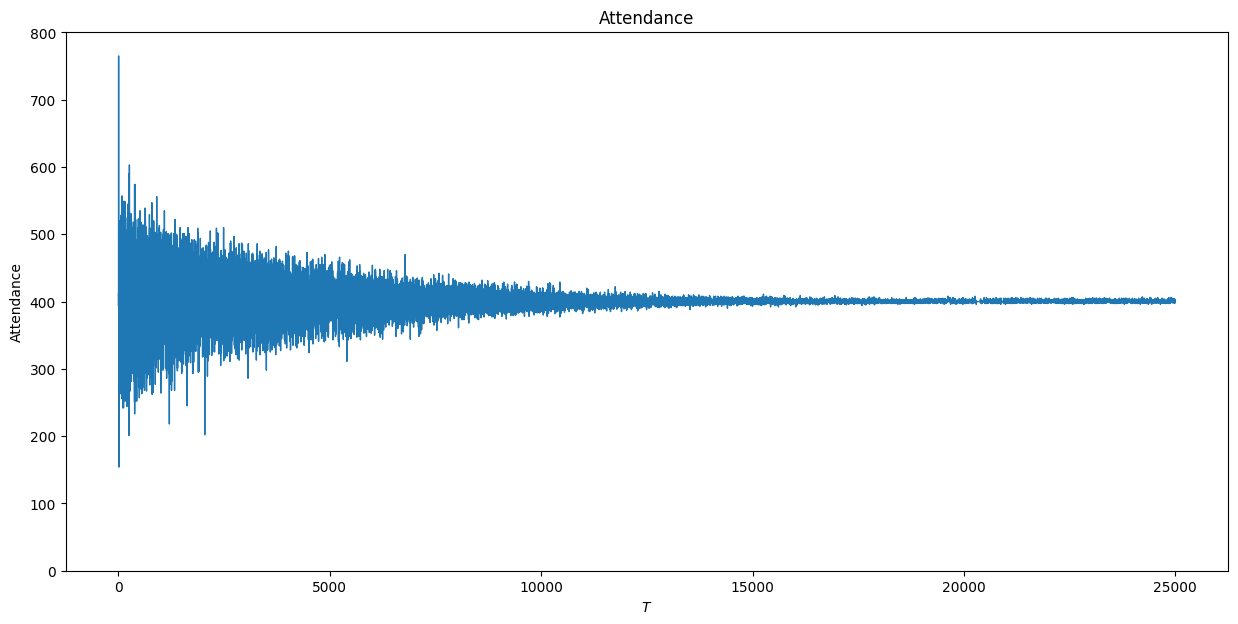

In [14]:
print(f"average attendance:\n\t{np.mean(attnrec)}")

plt.figure(figsize=(15, 7))
plt.plot(attnrec, lw=1.0)
plt.ylim((0,N))
plt.title('Attendance')
plt.xlabel('$T$')
plt.ylabel('Attendance')
plt.show()

In [15]:
gamerec = np.array(gamerec)
win_count = np.cumsum(gamerec, axis=0)*1.0

In [16]:
win_rate = win_count/np.cumsum(np.ones_like(win_count), axis=0)
# win_rate = win_count

final_round = win_rate[-1, :]
min_wr_idx = np.argwhere(final_round==np.min(final_round))[0]
max_wr_idx = np.argwhere(final_round==np.max(final_round))[0]
print(f"max wr\n\t{np.max(final_round)}")
print(f"min wr\n\t{np.min(final_round)}")

max wr
	0.5262
min wr
	0.44052


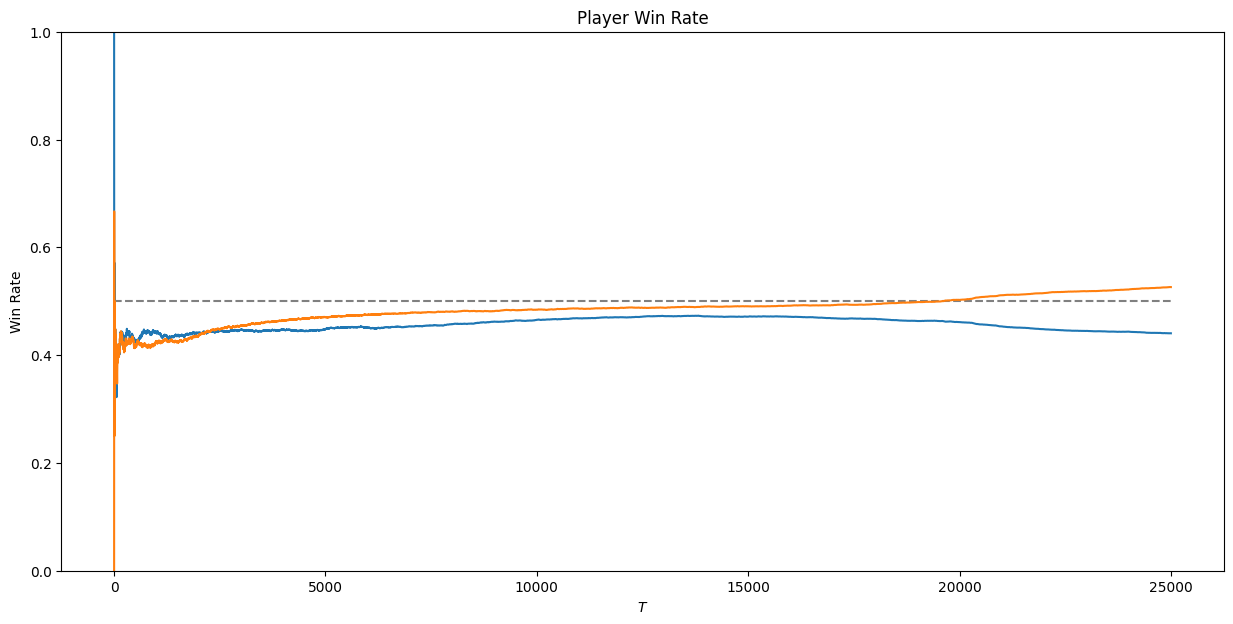

In [17]:
plt.figure(figsize=(15, 7))
plt.hlines(y=0.5, xmin=0, xmax=T_SIMU, linestyles='dashed', colors='gray')
plt.plot(win_rate[:, min_wr_idx])
plt.plot(win_rate[:, max_wr_idx])
plt.ylim((0,1))
plt.title('Player Win Rate')
plt.xlabel('$T$')
plt.ylabel('Win Rate')
plt.show()

In [18]:
mean_win_count = np.mean(win_count, axis=1).reshape(T_SIMU,1)

decentralized_performance = win_count-mean_win_count


final_round = decentralized_performance[-1, :]
min_perf_idx = np.argwhere(final_round==np.min(final_round))[0]
max_perf_idx = np.argwhere(final_round==np.max(final_round))[0]
print(f"max decentralized_performance\n\t{np.max(final_round)}")
print(f"min decentralized_performance\n\t{np.min(final_round)}")

max decentralized_performance
	1001.759051186018
min decentralized_performance
	-1140.240948813982


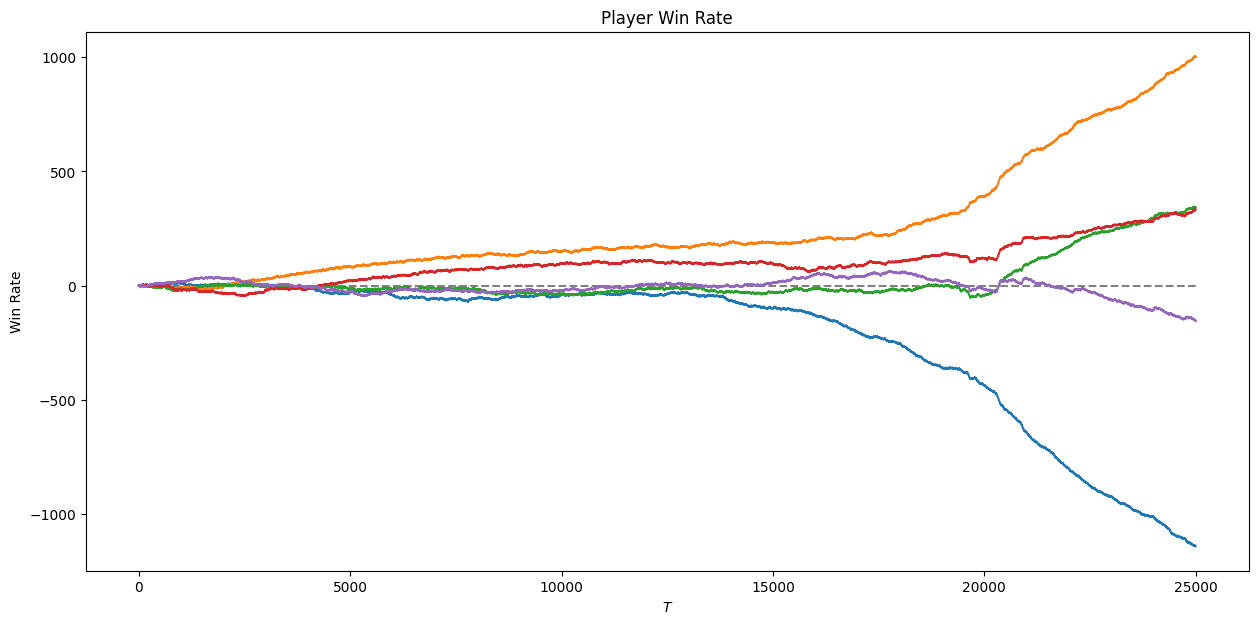

In [19]:
plt.figure(figsize=(15, 7))
plt.hlines(y=0, xmin=0, xmax=T_SIMU, linestyles='dashed', colors='gray')
plt.plot(decentralized_performance[:, min_perf_idx])
plt.plot(decentralized_performance[:, max_perf_idx])

rand_idx = np.random.choice(np.arange(N), size=3, replace=False)
plt.plot(decentralized_performance[:, rand_idx[0]])
plt.plot(decentralized_performance[:, rand_idx[1]])
plt.plot(decentralized_performance[:, rand_idx[2]])
plt.title('Player Win Rate')
plt.xlabel('$T$')
plt.ylabel('Win Rate')
plt.show()